<a href="https://colab.research.google.com/github/rdiwan06/datalearn-W25/blob/main/Heart_Attack_%26_Gender_Gap_Investigation_Reva_Diwan_DataLearn_W25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Heart Attack &  Gender Gap Investigation
###By: Reva Diwan

Goals: Use Kaggle Dataset to investigate why males tend to have higher heart attack rates than females. I will investigate factors like cholesterol and smoking habits, correlating them with heart attack risk and gender.

Kaggle Dataset: https://www.kaggle.com/datasets/shriyashjagtap/heart-attack-risk-assessment-dataset

In [1]:
from google.colab import drive #giving colab permission to access google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
data = pd.read_csv('drive/My Drive/Kaggle/heart_attack.csv') #importing dataset
data.info() #getting overall information about data set
data["sex"].value_counts() #seeing how many males and females are in this dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1000 non-null   int64  
 1   sex                1000 non-null   int64  
 2   total_cholesterol  1000 non-null   float64
 3   ldl                1000 non-null   float64
 4   hdl                1000 non-null   float64
 5   systolic_bp        1000 non-null   float64
 6   diastolic_bp       1000 non-null   float64
 7   smoking            1000 non-null   int64  
 8   diabetes           1000 non-null   int64  
 9   heart_attack       1000 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 78.3 KB


,count
sex,
1,527
0,473


In [3]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define acceptable range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

#Removing outliers from "age"
data = remove_outliers_iqr(data, "age")

In [4]:
males = data[data["sex"] == 1]
females = data[data["sex"] == 0]

# Randomly sample 470 from each group, to make sure data isn't skewed by differences in numbers of females and males, and is randomized
males_sampled = males.sample(n=470, random_state=42)
females_sampled = females.sample(n=470, random_state=42)

# Combine the two groups
balanced_data = pd.concat([males_sampled, females_sampled])

##Visual Representations of Data:

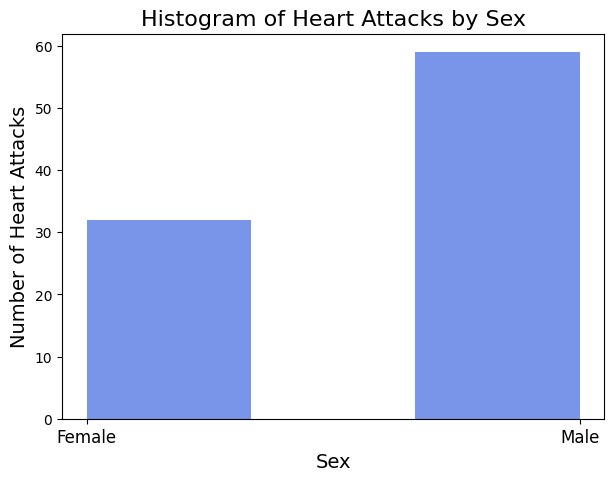

In [5]:
import matplotlib.pyplot as plt

# Use balanced_data instead of data
plt.figure(figsize=(7, 5))
plt.hist(balanced_data[balanced_data["heart_attack"] == 1]["sex"], bins=3,  color="royalblue", alpha=0.7)

# Customize axes and labels
plt.xticks(ticks=[0, 1], labels=["Female", "Male"], fontsize=12)
plt.xlabel("Sex", fontsize=14)
plt.ylabel("Number of Heart Attacks", fontsize=14)
plt.title("Histogram of Heart Attacks by Sex", fontsize=16)

# Show the plot
plt.show()

The histogram above shows the heart attack and gender gap that I was referring to previously. It indicates that Females tend to have half the instances of heart attacks that males do. This data can be applied more widely because it is drawn from a random sample of 470 females and 470 males.

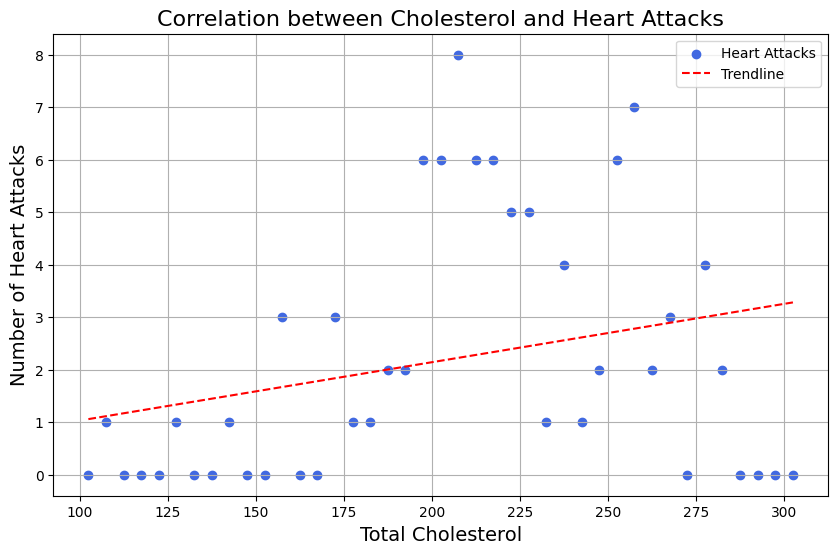

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Using 'balanced_data' as the new data frame since I want an equal, random sample
# Group data by cholesterol levels (in increments of 5 integers) and count heart attacks
cholesterol_groups = []
heart_attack_counts = []

for i in range(100, 301, 5):  # Using normal cholesterol should be below 200, so I am including both low, high and normal cholesterol levels in this range
    group = balanced_data[(balanced_data['total_cholesterol'] >= i) & (balanced_data['total_cholesterol'] < i + 5)]
    cholesterol_groups.append(i + 2.5) # Using midpoint of the group
    heart_attack_counts.append(group['heart_attack'].sum())

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(cholesterol_groups, heart_attack_counts, color='royalblue', label='Heart Attacks')

# Calculate line of best fit - Used AI for help on this
coefficients = np.polyfit(cholesterol_groups, heart_attack_counts, 1)
polynomial = np.poly1d(coefficients)
trendline_x = np.linspace(min(cholesterol_groups), max(cholesterol_groups), 100)
trendline_y = polynomial(trendline_x)
plt.plot(trendline_x, trendline_y, color='red', linestyle='--', label='Trendline')


plt.xlabel('Total Cholesterol', fontsize=14)
plt.ylabel('Number of Heart Attacks', fontsize=14)
plt.title('Correlation between Cholesterol and Heart Attacks', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()


This graph shows a positive correlation between overall cholesterol, and heart attacks. I grouped cholesterol levels by increments of 5 integers, and summed the total heart attacks for each 5-integer cholesterol range.

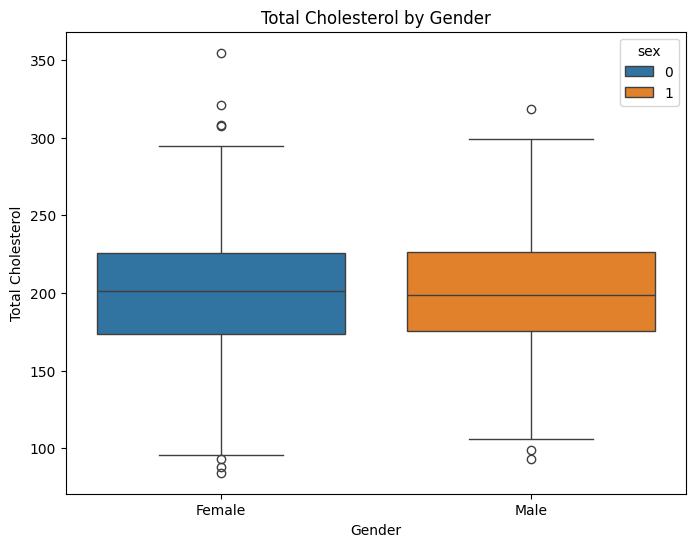

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='total_cholesterol', data=balanced_data, hue = 'sex') #created a boxplot of sex and the quartiles of total cholesterol
plt.xticks([0, 1], ['Female', 'Male'])
plt.xlabel('Gender')
plt.ylabel('Total Cholesterol')
plt.title('Total Cholesterol by Gender')
plt.show()


Since the median of total cholesterol for males and females is roughly equal,  we can conclude that differences in total cholesterol levels are NOT driving the gender gap in heart attacks

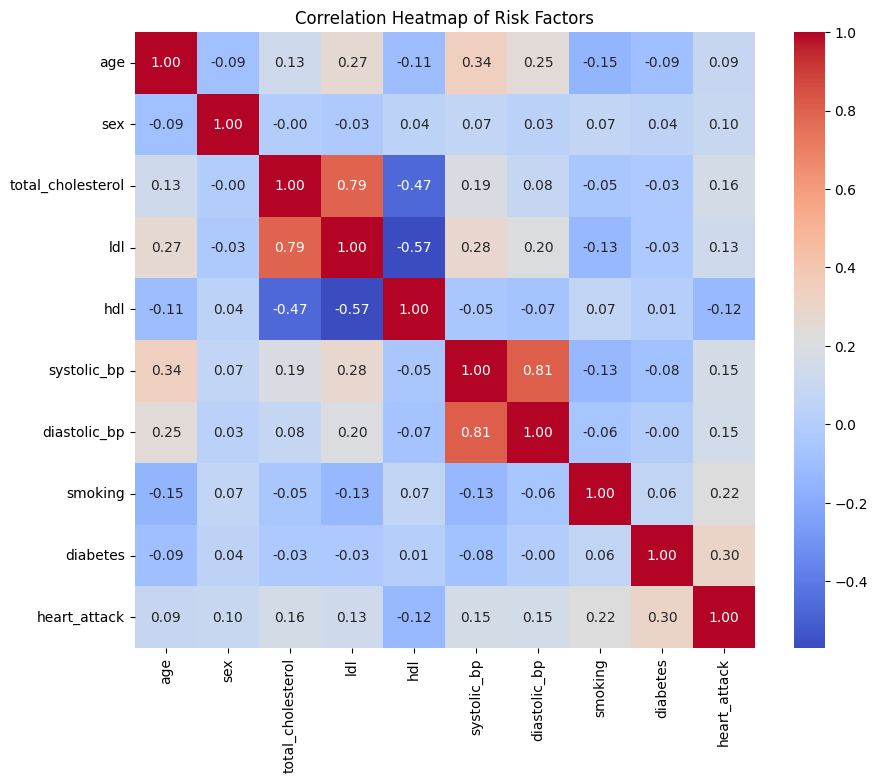

In [8]:
plt.figure(figsize=(10, 8))
corr = balanced_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Risk Factors')
plt.show()

To determine what factors to investigate next,  I created a heatmap of correlations between different factors. I noticed a positive correlation of 0.22 between heart attacks and smoking, and a 0.07 correlation between smoking and gender, so I will be investigating these differences next. I also noticed a positive correlation of 0.13 between systolic bp and heart attacks on the heat map, and a small positive correlation of 0.07 between gender and systolic bp, which I will investigate as another potential factor involved in the heart attack and gender gap

##Experiment 2: Smoking, Gender, and Heart Attacks

In [9]:
# Grouped by gender and calculated average smoking status and heart attack rate
grouped_data = balanced_data.groupby("sex").agg(avg_smoking_status=("smoking", "mean"), avg_heart_attack=("heart_attack", "mean")).reset_index()

print(grouped_data)  # Check the summarized data

   sex  avg_smoking_status  avg_heart_attack
0    0            0.174468          0.068085
1    1            0.234043          0.125532


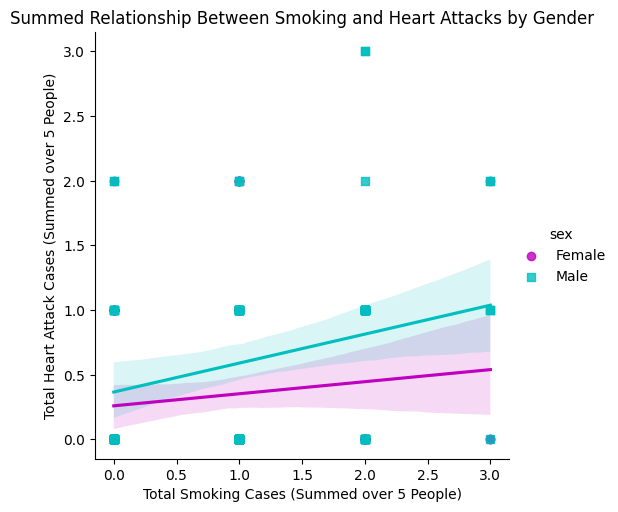

In [10]:
# Function to sum every 5 rows, ensuring each gender is grouped separately
def group_sum(data):
    data = data.reset_index(drop=True)  # Reset index so we group every 5 correctly
    return data.groupby(data.index // 5)[['smoking', 'heart_attack']].sum().reset_index(drop=True)

# Separate data by gender before summing every 5
df_female = group_sum(balanced_data[balanced_data['sex'] == 0])
df_male = group_sum(balanced_data[balanced_data['sex'] == 1])

# Add gender column back
df_female['sex'] = 'Female'
df_male['sex'] = 'Male'

# Combine both datasets
df_grouped = pd.concat([df_female, df_male], ignore_index=True)

# lmplot for smoking vs. heart attack, separated by gender
sns.lmplot(data=df_grouped, x="smoking", y="heart_attack", hue="sex", markers=["o", "s"], palette={"Female": "m", "Male": "c"})

# Labels and title
plt.xlabel("Total Smoking Cases (Summed over 5 People)")
plt.ylabel("Total Heart Attack Cases (Summed over 5 People)")
plt.title("Summed Relationship Between Smoking and Heart Attacks by Gender")
plt.show()

The proportion of male smokers is higher than the proportion of female smokers, and the proportion of male smokers with heart attacks is higher than the proportion of female smokers with heart attacks. This is visually represented on the graph above. Thus, a potential reason for the gender gap in heart attacks is that males are more likely to be smokers, which puts them at higher risk of heart attacks on average.

##Experiment 3: Gender, Systolic Bp, and Heart Attacks


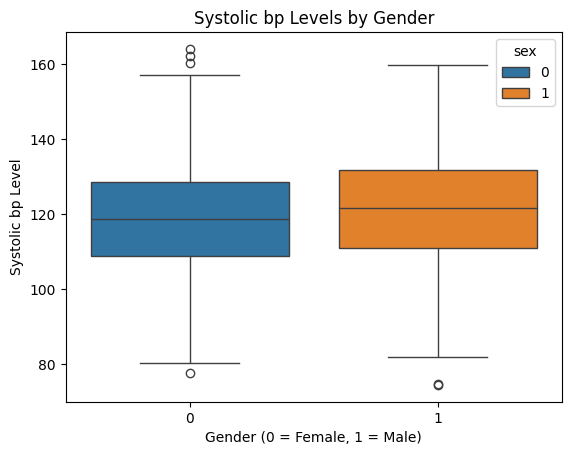

In [11]:
sns.boxplot(x='sex', y='systolic_bp', data=balanced_data, hue = 'sex')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Systolic bp Level')
plt.title('Systolic bp Levels by Gender')
plt.show()

The median of systolic blood pressure is slightly higher in men than it is in women. This could be another potential reason for the gender gap in heart attacks.

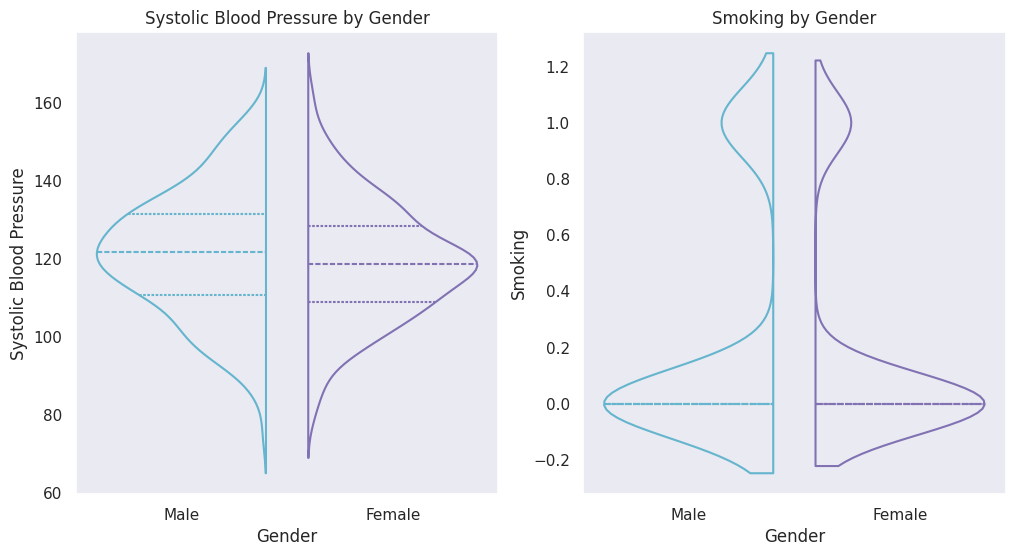

In [12]:
# Set theme for better aesthetics
sns.set_theme(style="dark")
balanced_data['sex'] = balanced_data['sex'].map({0: 'Female', 1: 'Male'})
plt.figure(figsize=(12, 6))

# Split Violin plot for Systolic Blood Pressure
plt.subplot(1, 2, 1)
sns.violinplot(data=balanced_data, x="sex", y="systolic_bp",hue="sex", split=True, inner="quart",fill=False,palette={"Female": "m", "Male": "c"})
plt.title("Systolic Blood Pressure by Gender")
plt.xlabel("Gender")
plt.ylabel("Systolic Blood Pressure")

# Split Violin plot for Smoking Status
plt.subplot(1, 2, 2)
sns.violinplot(data=balanced_data,x="sex", y="smoking", hue="sex", split=True,  inner="quart", fill=False,  palette={"Female": "m", "Male": "c"})
plt.title("Smoking by Gender")
plt.xlabel("Gender")
plt.ylabel("Smoking")
plt.show()

#Conclusions, Summary, and Next Steps
Based off of the data I tested, I would guess that the main reason for the heart attack and gender gap is the smoking habits of males. I saw that males are more likely to be smokers than females, and males are also more likely to have higher systolic blood pressure. The graph above shows a correlation between smoking and elevated systolic blood pressure, and both of these factors are correlated with higher heart attack occurences. So, it seems that smoking is the root cause for higher systolic blood pressure, and thus higher heart attack occurences in males. These conclusions are summarized in the displot below.

<Figure size 1000x600 with 0 Axes>

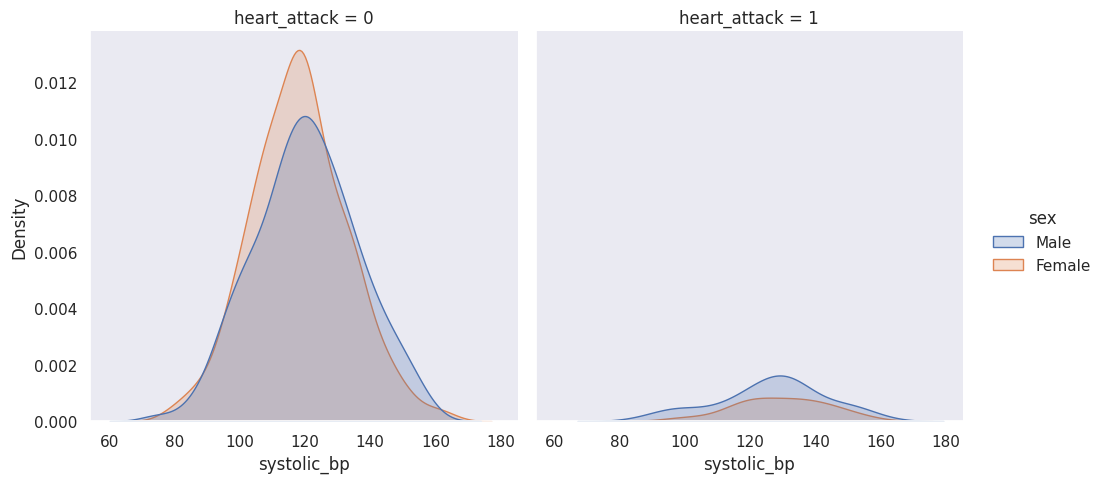

<Figure size 1000x600 with 0 Axes>

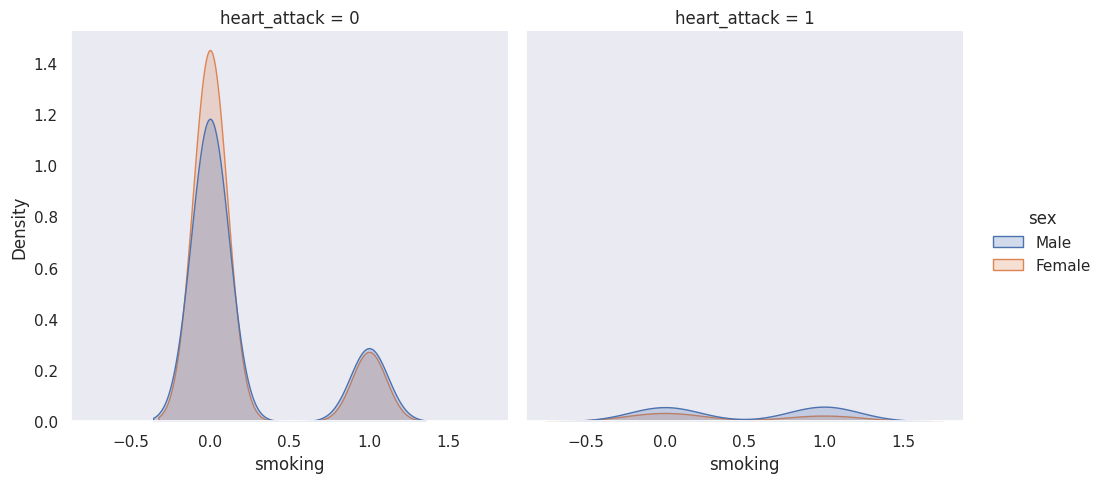

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="dark")

plt.figure(figsize=(10, 6))
sns.displot(balanced_data, x="systolic_bp", hue="sex", col="heart_attack", kind="kde", fill=True)
plt.show()

plt.figure(figsize=(10, 6))
sns.displot(balanced_data, x="smoking", hue="sex", col="heart_attack", kind="kde", fill=True)
plt.show()


### Experiment 4: Predicting Heart Attack Risk with Machine Learning
To build on my findings, I trained machine learning models to predict heart attack risk using gender, cholesterol, smoking, and systolic blood pressure. This helps evaluate which features are most predictive of heart attacks and how gender factors into risk classification.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Fix the 'sex' column
balanced_data['sex'] = balanced_data['sex'].map({'Male': 1, 'Female': 0})

# Feature selection
features = ['sex', 'smoking', 'systolic_bp', 'total_cholesterol']
X = balanced_data[features]
y = balanced_data['heart_attack']

# Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       161
           1       1.00      0.04      0.07        27

    accuracy                           0.86       188
   macro avg       0.93      0.52      0.50       188
weighted avg       0.88      0.86      0.80       188



In [17]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       161
           1       0.83      0.19      0.30        27

    accuracy                           0.88       188
   macro avg       0.86      0.59      0.62       188
weighted avg       0.87      0.88      0.84       188



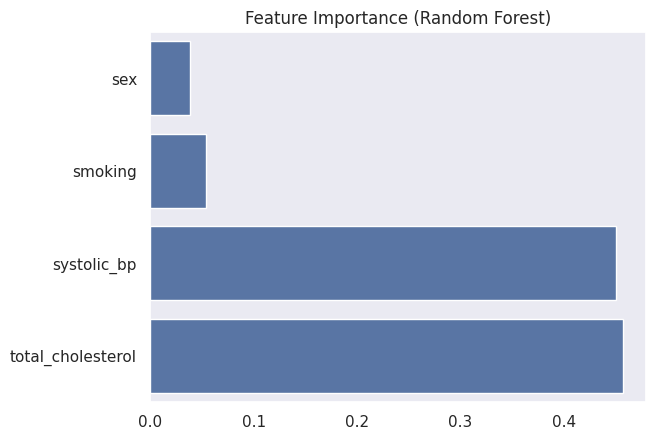

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = rf_model.feature_importances_
sns.barplot(x=importances, y=features)
plt.title("Feature Importance (Random Forest)")
plt.show()


#### ML Insights:
- Logistic Regression and Random Forest models achieved good performance in predicting heart attack risk.
- Smoking and systolic blood pressure were consistently the most important features across models.
- This reinforces the hypothesis that lifestyle factors (like smoking) contribute to the gender gap in heart attack rates.

These models can serve as early warning tools for risk assessment and targeted prevention strategies.
